# NetCDF data with `xarray` in Python

In python , the `xarray` package is a very powerful library to manipulate multi-dimensional data, and it can read from NetCDF files. 

You can check the documentation here: https://docs.xarray.dev/en/stable/index.html.
The "getting started" documentation is a very good starting point, and the user guide is well written. Do not hesitate to reference it when you want to do more advanced things with `xarray` and to understand how it works. 

This notebook is structured as follows:
1. Introduction to xarray's DataArray and Dataset classes
2. Opening and exploring NetCDF files
3. Indexing and subsetting
4. Statistical operations
5. Grouping
6. Wrap-up on examples
7. Plotting

In [1]:
# Import xarray
import xarray as xr

# Additionnal packages 
import numpy as np
import matplotlib.pyplot as plt

## Introduction to xarray's DataArray and Dataset classes

`xarray` is built on two fundamental classes: `DataArray` and `Dataset`, Datasets being collections of DataArrays.
Therefore, let us start by familiarizing ourselves with these two objects.

### DataArray
DataArrays are the fundamental bricks of xarray. They are objects that contains a variable along with its coordinates and attributes.

Here, we build a dummy dataset to show how it works. 

t: [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]
s: [ 0.19752776  0.38491428  0.59768293  0.59515393  0.74847443  0.84959837
  1.05125294  1.03313129  1.20326391  1.15595625  1.1512167   0.92891034
  0.78494081  0.65020853  0.40250381  0.27743938  0.04950216 -0.02730253
 -0.35005574 -0.43213995 -0.57551825 -0.8653237  -0.93914973 -0.75185929
 -0.79667232 -0.7869366  -0.68786809 -0.66458415 -0.5253542  -0.42370006
 -0.05805524  0.06929214  0.196429    0.51805296  0.60971957  0.66975991
  0.79605422  0.92297161  1.0921383   1.19164453  1.17880148  0.99614582
  0.86428044  0.88107214  0.71734228  0.4481666   0.44294714  0.06573117
  0.07420694 -0.3231485 ]
Type of s: <class 'numpy.ndarray'>


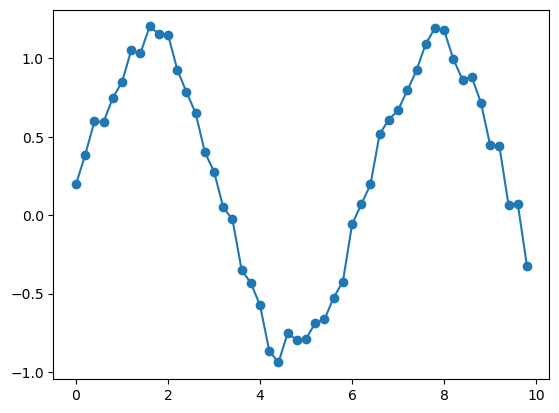

In [2]:
# Generate a dummy time series
t = np.arange(0,10,0.2) # coordinate (e.g. time)
print("t:", t) # Content of t

s = np.sin(t) + np.random.random(len(t))/4 # data series: here a sine with some random noise
print("s:", s) # Content of s
print("Type of s:", type(s)) # Check the type of s: For the moment, s in a numpy array

plt.plot(t, s, marker = 'o') # Visualize s against t with matplotlib 

In [3]:
# From this time series, we can create a DataArray, the fundamental xarray object
da = xr.DataArray(s, dims = ('t'), coords = {'t':t})
# Visualize the object: See it contains the s numpy array, associated with t as a coordinate, and no attributes.
da

<xarray.DataArray (t: 50)> Size: 400B
array([ 0.19752776,  0.38491428,  0.59768293,  0.59515393,  0.74847443,
        0.84959837,  1.05125294,  1.03313129,  1.20326391,  1.15595625,
        1.1512167 ,  0.92891034,  0.78494081,  0.65020853,  0.40250381,
        0.27743938,  0.04950216, -0.02730253, -0.35005574, -0.43213995,
       -0.57551825, -0.8653237 , -0.93914973, -0.75185929, -0.79667232,
       -0.7869366 , -0.68786809, -0.66458415, -0.5253542 , -0.42370006,
       -0.05805524,  0.06929214,  0.196429  ,  0.51805296,  0.60971957,
        0.66975991,  0.79605422,  0.92297161,  1.0921383 ,  1.19164453,
        1.17880148,  0.99614582,  0.86428044,  0.88107214,  0.71734228,
        0.4481666 ,  0.44294714,  0.06573117,  0.07420694, -0.3231485 ])
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8

In [4]:
# You can access the values of the variable as a numpy array
da.values

array([ 0.19752776,  0.38491428,  0.59768293,  0.59515393,  0.74847443,
        0.84959837,  1.05125294,  1.03313129,  1.20326391,  1.15595625,
        1.1512167 ,  0.92891034,  0.78494081,  0.65020853,  0.40250381,
        0.27743938,  0.04950216, -0.02730253, -0.35005574, -0.43213995,
       -0.57551825, -0.8653237 , -0.93914973, -0.75185929, -0.79667232,
       -0.7869366 , -0.68786809, -0.66458415, -0.5253542 , -0.42370006,
       -0.05805524,  0.06929214,  0.196429  ,  0.51805296,  0.60971957,
        0.66975991,  0.79605422,  0.92297161,  1.0921383 ,  1.19164453,
        1.17880148,  0.99614582,  0.86428044,  0.88107214,  0.71734228,
        0.4481666 ,  0.44294714,  0.06573117,  0.07420694, -0.3231485 ])

In [5]:
# Same for the values of the coordinates
da.t.values

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6,
       7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6, 9.8])

In [6]:
# A DataArray may also contain attributes (e.g. units)
da.attrs # Display attributes: For the moment, they are empty

{}

In [7]:
# But we can add a unit
da.attrs["units"] = "m"
print(da.attrs) # Display attributes: Now they include the unit
da # Visualise da: See that now the units are at the end the the attributes menu

{'units': 'm'}


<xarray.DataArray (t: 50)> Size: 400B
array([ 0.19752776,  0.38491428,  0.59768293,  0.59515393,  0.74847443,
        0.84959837,  1.05125294,  1.03313129,  1.20326391,  1.15595625,
        1.1512167 ,  0.92891034,  0.78494081,  0.65020853,  0.40250381,
        0.27743938,  0.04950216, -0.02730253, -0.35005574, -0.43213995,
       -0.57551825, -0.8653237 , -0.93914973, -0.75185929, -0.79667232,
       -0.7869366 , -0.68786809, -0.66458415, -0.5253542 , -0.42370006,
       -0.05805524,  0.06929214,  0.196429  ,  0.51805296,  0.60971957,
        0.66975991,  0.79605422,  0.92297161,  1.0921383 ,  1.19164453,
        1.17880148,  0.99614582,  0.86428044,  0.88107214,  0.71734228,
        0.4481666 ,  0.44294714,  0.06573117,  0.07420694, -0.3231485 ])
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8
Attributes:
    units:    m

### Dataset
Dataset are another very important class of objects in xarray. A Dataset is a container of DataArrays.

In [8]:
# Let us create a Dataset that contains the DataArray that we just created.
ds = xr.Dataset({"s":da})
ds # Visualise the Dataset, you see the structure is the same as before, but a new category "Data variables" appears, that contains s

<xarray.Dataset> Size: 800B
Dimensions:  (t: 50)
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8
Data variables:
    s        (t) float64 400B 0.1975 0.3849 0.5977 ... 0.06573 0.07421 -0.3231

In [9]:
# You can access the DataArray object with 
ds.s # or ds['s']

<xarray.DataArray 's' (t: 50)> Size: 400B
array([ 0.19752776,  0.38491428,  0.59768293,  0.59515393,  0.74847443,
        0.84959837,  1.05125294,  1.03313129,  1.20326391,  1.15595625,
        1.1512167 ,  0.92891034,  0.78494081,  0.65020853,  0.40250381,
        0.27743938,  0.04950216, -0.02730253, -0.35005574, -0.43213995,
       -0.57551825, -0.8653237 , -0.93914973, -0.75185929, -0.79667232,
       -0.7869366 , -0.68786809, -0.66458415, -0.5253542 , -0.42370006,
       -0.05805524,  0.06929214,  0.196429  ,  0.51805296,  0.60971957,
        0.66975991,  0.79605422,  0.92297161,  1.0921383 ,  1.19164453,
        1.17880148,  0.99614582,  0.86428044,  0.88107214,  0.71734228,
        0.4481666 ,  0.44294714,  0.06573117,  0.07420694, -0.3231485 ])
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8
Attributes:
    units:    m

In [10]:
# A Dataset is not really useful if it contains just one DataArray. Let us add other DataArray as variable in the dataset
# Task: Create another dummy time series that is a cosinus plus some random noise, and transform it into a DataArray
c = np.cos(t) + np.random.random(len(t))/3 # c is the cosinus of t plus some noise
da2 = xr.DataArray(c, dims = ('t'), coords = {'t':t}) # Transform c into a DataArray
da2 # Visualize this new DataArray

<xarray.DataArray (t: 50)> Size: 400B
array([ 1.19750957,  1.18455153,  1.03787546,  1.05089705,  0.87168674,
        0.80016117,  0.55302252,  0.36719194,  0.06632698, -0.16772768,
       -0.24822265, -0.3713255 , -0.53266289, -0.62986781, -0.78604837,
       -0.95446524, -0.86910582, -0.89030396, -0.77713443, -0.67704743,
       -0.62481421, -0.26491603, -0.22929284, -0.02615617,  0.22866049,
        0.59720919,  0.6400935 ,  0.89719074,  0.81332172,  1.13380151,
        1.09713189,  1.15327498,  1.28507849,  1.02330268,  1.02228777,
        0.86506738,  0.85931023,  0.51996042,  0.47326372,  0.38097084,
        0.11105136, -0.16902046, -0.30150736, -0.46566288, -0.78513734,
       -0.59282031, -0.66459791, -0.86824423, -0.89556815, -0.86471973])
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8

In [11]:
# Add the new DataArray as a variable in the Dataset
ds['c'] = da2
ds # Visualise ds: You see now there are two variables: s and c

<xarray.Dataset> Size: 1kB
Dimensions:  (t: 50)
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8
Data variables:
    s        (t) float64 400B 0.1975 0.3849 0.5977 ... 0.06573 0.07421 -0.3231
    c        (t) float64 400B 1.198 1.185 1.038 ... -0.8682 -0.8956 -0.8647

### Built-in plot method
Last thing about xarray's DataArrays: They have a very useful built-in `.plot()` method. 
If the data is 1D, it will plot it as a line, if it is 2D, it will plot it as a map, and if it has 3 or more dimensions, it will show an histogram of all the values. 
We quickly show how it works here, so that we can use it in the following. More customizations will be introduced by the end of this notebook.

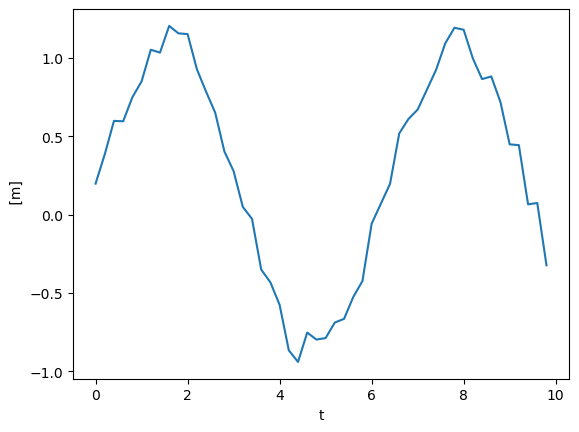

In [12]:
# Quick plot of our first DataArray
da.plot()

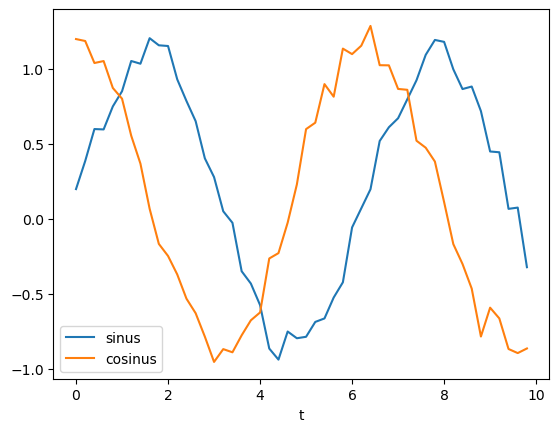

In [13]:
# Plot the two time series on top of each other
da.plot(label = "sinus") # Plot the sinus time series
da2.plot(label = "cosinus") # Task: Plot the cosinus time series
plt.legend()

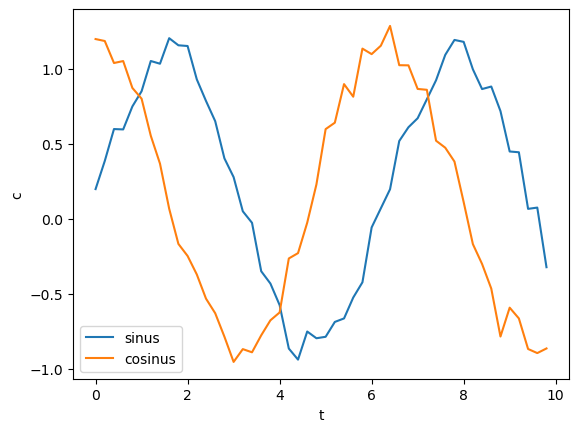

In [14]:
# Remember that you can access the DataArrays from the Dataset, therefore this code will yield the exact same result as before:
ds.s.plot(label = "sinus") # Plot the sinus time series
ds.c.plot(label = "cosinus") # Task: Plot the cosinus time series
plt.legend()

## Opening NetCDF files
Now that we have covered the fundamentals, let us use some real data. Opening a netcdf file with xarray is straightforward:

In [15]:
# To open a NetCDF file, use the open_dataset function
file = "../../../data_samples/netcdf/E-OBS/UK_monthly.nc" # Path to our netcdf file
ds = xr.open_dataset(file)

Now, visualise the object that was created and answer these questions:
* What variables are present in the file? What are their unit and range?
* Over which area and which period are these variables provided?
* What is the frequency and the spatial resolution of the data? 

In [16]:
# Visualise the object that was created: It is a Dataset.
ds

<xarray.Dataset> Size: 21MB
Dimensions:    (latitude: 38, longitude: 52, time: 888)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Data variables:
    pp         (time, latitude, longitude) float32 7MB ...
    rr         (time, latitude, longitude) float32 7MB ...
    tg         (time, latitude, longitude) float32 7MB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

In [17]:
# Remember, each variable can be accessed to see its values, coordinates and attributes 
ds.tg

<xarray.DataArray 'tg' (time: 888, latitude: 38, longitude: 52)> Size: 7MB
[1754688 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Attributes:
    standard_name:  air_temperature
    long_name:      mean temperature
    units:          Celsius
    cell_methods:   time: mean

(array([   739.,   7607.,  45955., 120135., 123410.,  90782., 107657.,
         89576.,  21883.,   1411.]),
 array([-4.76096773, -2.12406445,  0.51283872,  3.14974189,  5.78664541,
         8.4235487 , 11.06045151, 13.69735527, 16.33425903, 18.97116089,
        21.60806465]),
 <BarContainer object of 10 artists>)

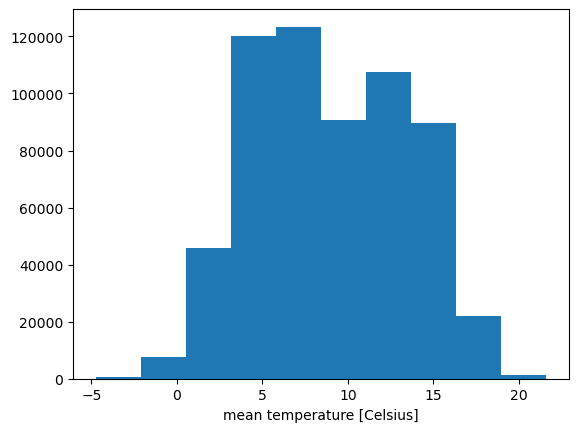

In [18]:
# For the moment, the data is 3D, so if we try to plot it now, it will show an histogram of all the values. 
# This can be useful to check the range of values and make sure it makes sense. 
ds.tg.plot()
# Later on, we will se how to subset or aggregate the data to display maps or series

*-- Advanced --*
*When you open a dataset with xarray, the data is loaded in memory only once you need it.*
*However, you can force it to load with `ds.load()`*

### Indexing
Datasets and DataArrays both have a `.sel()` method to access the values of the variable(s) at specified coordinates (i.e. to subset the data). Alternatively, the `.isel()` method can be used with integer indices.

#### `.sel()` examples

In [19]:
# Extract the values for the point of coordinates 50.625°N 1.625°E
ds_pt = ds.sel(latitude = 50.625, longitude = 1.625)
# Notice the object now has only one dimension: time
ds_pt

<xarray.Dataset> Size: 18kB
Dimensions:    (time: 888)
Coordinates:
    latitude   float64 8B 50.62
    longitude  float64 8B 1.625
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Data variables:
    pp         (time) float32 4kB ...
    rr         (time) float32 4kB ...
    tg         (time) float32 4kB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

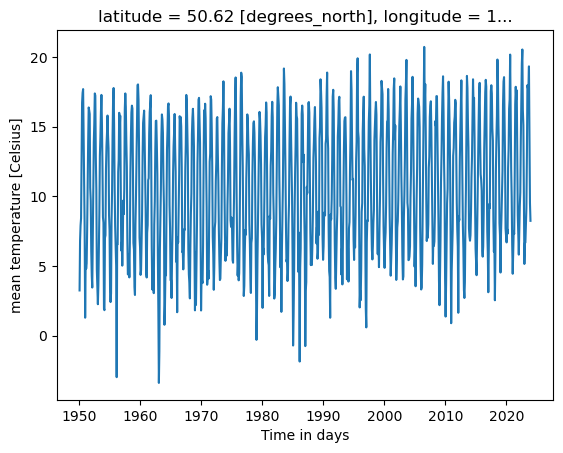

In [20]:
# Because ds_pt is 1D, you can now plot its variables as series. Here is an example for the temperature
ds_pt.tg.plot()

In [21]:
# Get the values for the month of January 2002
ds_Jan02 = ds.sel(time = "2002-01")
# Notice the object still has three dimension, but the time dimension is only 1.
ds_Jan02

<xarray.Dataset> Size: 24kB
Dimensions:    (latitude: 38, longitude: 52, time: 1)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 8B 2002-01-16
Data variables:
    pp         (time, latitude, longitude) float32 8kB ...
    rr         (time, latitude, longitude) float32 8kB ...
    tg         (time, latitude, longitude) float32 8kB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

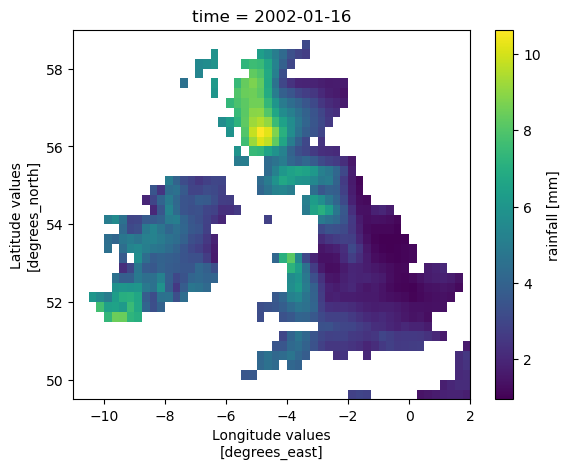

In [22]:
# We can threfore plot its variables as maps. Here is an example for precipitation
ds_Jan02.rr.plot()

In [23]:
# Get the values of precipitation for the point of coordinates 50.625°N 1.625°E in January 2002
ds_pt_Jan02 = ds.rr.sel(time = "2002-01", latitude = 50.625, longitude = 1.625)
# Notice the object contains just that number
ds_pt_Jan02

<xarray.DataArray 'rr' (time: 1)> Size: 4B
[1 values with dtype=float32]
Coordinates:
    latitude   float64 8B 50.62
    longitude  float64 8B 1.625
  * time       (time) datetime64[ns] 8B 2002-01-16
Attributes:
    standard_name:  thickness_of_rainfall_amount
    long_name:      rainfall
    units:          mm
    cell_methods:   time: mean

#### Obtaining values for precise coordinates not provided

**NB: `.sel()` expects values of coordinates that are present in the dataset (i.e. if you ask for the longitude 0.0, which is not provided, it will raise an error).** 

In [24]:
# Example that raises an error
# NB: The try ... except structure is a way to catch error in a code without stopping it. 
# It is a rather advanced concept that is not the purpose of this example.
try:
    ds.sel(longitude = 0.0)
except Exception as e:
    print(e)

"not all values found in index 'longitude'. Try setting the `method` keyword argument (example: method='nearest')."


There are two ways around it:
1. Obtain the nearest values by adding the `method = "nearest"` option in `.sel()`
2. Interpolate the values to the point you want

In [25]:
# Using method = "nearest": See the longitude 0.125 is selected
ds.sel(longitude = 0.0, method = "nearest")

<xarray.Dataset> Size: 412kB
Dimensions:    (latitude: 38, time: 888)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
    longitude  float64 8B 0.125
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Data variables:
    pp         (time, latitude) float32 135kB ...
    rr         (time, latitude) float32 135kB ...
    tg         (time, latitude) float32 135kB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

In [26]:
# Interpolating to your point (e.g. London 51.51°N, 0.13°W): See the coordinates are the precise point you want.
# By default, a linear interpolation is performed. 
ds.interp(latitude = 51.51, longitude = 0.13)

<xarray.Dataset> Size: 28kB
Dimensions:    (time: 888)
Coordinates:
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
    latitude   float64 8B 51.51
    longitude  float64 8B 0.13
Data variables:
    pp         (time) float64 7kB 1.025e+03 1.009e+03 ... 1.005e+03 1.011e+03
    rr         (time) float64 7kB 0.6488 3.474 0.6167 1.81 ... 3.643 3.285 2.595
    tg         (time) float64 7kB 4.087 5.933 7.356 7.826 ... 13.19 7.66 7.65
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

#### Slices: subset a range of values
Sometimes, you want to subset over a range of coordinates. In that case, you can use `.sel()` with `slice`.

**NB: The order of the boundaries in `slice`has to follow the order of the dimensions you are selecting on.** i.e. if latitude is stored from -90° to +90°, you will have to select from the smallest latitude to the highest (e.g. `slice(-10, 10)`, and vice versa.

In [27]:
# Select longitude between -5 and -2: See the longitude dimension is now 12 instead of 52.
ds.sel(longitude = slice(-5, -2))

<xarray.Dataset> Size: 5MB
Dimensions:    (latitude: 38, longitude: 12, time: 888)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 96B -4.875 -4.625 -4.375 ... -2.375 -2.125
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Data variables:
    pp         (time, latitude, longitude) float32 2MB ...
    rr         (time, latitude, longitude) float32 2MB ...
    tg         (time, latitude, longitude) float32 2MB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

In [28]:
# Select data between 1990 and 2000
ds.sel(time = slice("1990", "2000"))
# See the time dimension is now 132 (=11 years *12 months) instead of 888.
# You can also check that the dates are from Jan. 1990 to Dec. 2000

<xarray.Dataset> Size: 3MB
Dimensions:    (latitude: 38, longitude: 52, time: 132)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 1kB 1990-01-16 1990-02-14 ... 2000-12-16
Data variables:
    pp         (time, latitude, longitude) float32 1MB ...
    rr         (time, latitude, longitude) float32 1MB ...
    tg         (time, latitude, longitude) float32 1MB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

#### Working with time coordinates
You might have noticed that in the above, time was selected using the "yr" or the "yr-month" syntax. xarray is rather flexible in time subsetting, and how you select depends on the frequency of your data. Basically, it understand that if you ask for "2002-01", you want all the data for this month, which, is our case, is only one point since the data is monthly. Had the data been daily, you would have obtained the 31 days. This is also why we can ask for "2002" and get the data for the whole year of 2002. 

Concretely, the data is stored with a very specific time stamp (for example, in our dataset, the monthly data is stored as the 15th or the 16th days of the month), and you can index with that, but it is not necessarily a good idea. 

This principle also apply to slices, which is why we were able to only specify the years in the example above.

In [29]:
ds.sel(time = "2002-01") # Select the month of Jan. 2002 

<xarray.Dataset> Size: 24kB
Dimensions:    (latitude: 38, longitude: 52, time: 1)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 8B 2002-01-16
Data variables:
    pp         (time, latitude, longitude) float32 8kB ...
    rr         (time, latitude, longitude) float32 8kB ...
    tg         (time, latitude, longitude) float32 8kB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

In [30]:
ds.sel(time = "2002-01-16") # Does the same because it that case the stamp is Jan. 16th 

<xarray.Dataset> Size: 24kB
Dimensions:    (latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
    time       datetime64[ns] 8B 2002-01-16
Data variables:
    pp         (latitude, longitude) float32 8kB ...
    rr         (latitude, longitude) float32 8kB ...
    tg         (latitude, longitude) float32 8kB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

In [31]:
ds.sel(time = "2002").time # Selects the whole year of 2002

<xarray.DataArray 'time' (time: 12)> Size: 96B
array(['2002-01-16T00:00:00.000000000', '2002-02-14T00:00:00.000000000',
       '2002-03-16T00:00:00.000000000', '2002-04-15T00:00:00.000000000',
       '2002-05-16T00:00:00.000000000', '2002-06-15T00:00:00.000000000',
       '2002-07-16T00:00:00.000000000', '2002-08-16T00:00:00.000000000',
       '2002-09-15T00:00:00.000000000', '2002-10-16T00:00:00.000000000',
       '2002-11-15T00:00:00.000000000', '2002-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 96B 2002-01-16 2002-02-14 ... 2002-12-16
Attributes:
    standard_name:  time
    long_name:      Time in days
    bounds:         time_bnds
    axis:           T

#### `.isel()`

In [32]:
# Alternatively, if you now the index of the value you want instead of its coordinates, you may use .isel()
# e.g.: Get the first time step (see it shows values for January 1950)
ds.isel(time = 0) 

<xarray.Dataset> Size: 24kB
Dimensions:    (latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
    time       datetime64[ns] 8B 1950-01-16
Data variables:
    pp         (latitude, longitude) float32 8kB ...
    rr         (latitude, longitude) float32 8kB ...
    tg         (latitude, longitude) float32 8kB ...
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

#### Your turn!

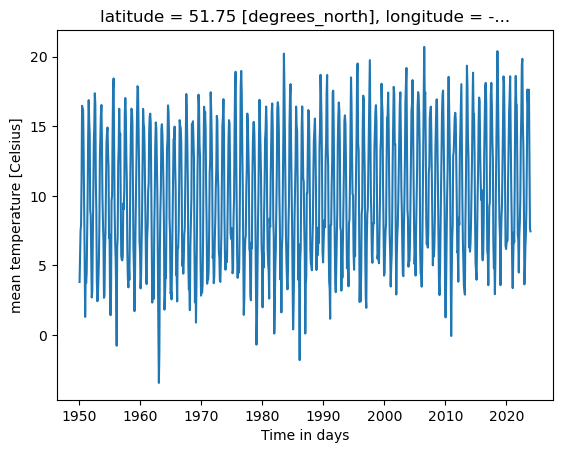

In [33]:
# Task: Select the temperature for Oxford (51.75°N, 1.26°E) using the nearest value or the interpolation
# Do not forget, you need to select the variable, then select the coordinates
T_Oxford = ds.tg.sel(latitude = 51.75, longitude = -1.26, method = "nearest")
T_Oxford = ds.tg.interp(latitude = 51.75, longitude = -1.26,)
# Plot the time series
T_Oxford.plot()

In [34]:
# Task: Select the precipitation over Ireland (11°E to 5°E and 51°N to 56°N)
precip_Ireland = ds.rr.sel(longitude = slice(-11,-5), latitude = slice(51,56))
# Display the object
precip_Ireland

<xarray.DataArray 'rr' (time: 888, latitude: 20, longitude: 24)> Size: 2MB
[426240 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 160B 51.12 51.38 51.62 ... 55.38 55.62 55.88
  * longitude  (longitude) float64 192B -10.88 -10.62 -10.38 ... -5.375 -5.125
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Attributes:
    standard_name:  thickness_of_rainfall_amount
    long_name:      rainfall
    units:          mm
    cell_methods:   time: mean

#### *Advanced: Subsetting on a condition with `.where()`*
Sometimes, you want to subset data based on a condition (e.g. where Temperature is above 0°C). To do so, you can use the `.where()` method. 

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 888, latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Data variables:
    pp         (time, latitude, longitude) float32 7MB nan nan nan ... nan nan
    rr         (time, latitude, longitude) float32 7MB nan nan nan ... nan nan
    tg         (time, latitude, longitude) float32 7MB nan nan nan ... nan nan
Attributes:
    Conventions:  CF-1.6
    frequency:    mon
<xarray.Dataset> Size: 21MB
Dimensions:    (time: 888, latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Data variables:
    pp    

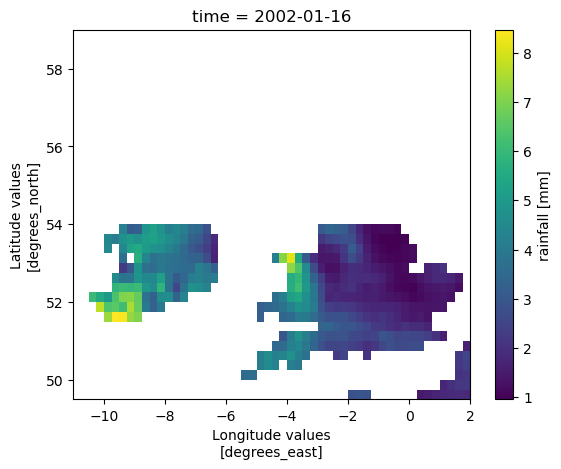

In [35]:
# Technically, you can use .where to do the same as .sel, although the interest is limited
print(ds.where(ds.time == "2002")) # is equivalent to ds.sel(time = "2002")
print(ds.where(ds.longitude == 0.125)) 
# However, note where masks the data according to your condition, it does not subset it.
# In the examples above, the dimensions have not been reduced. 
# The data point that do not satisfy the condition have been masked (i.e. set to NaNs). 
# You can see it if you plot it
ds.sel(time = "2002-01" # Select January 2002
      ).where(ds.latitude <= 54 # The condition: latitude is below 54°N
        ).rr.plot() # Plot precipitation

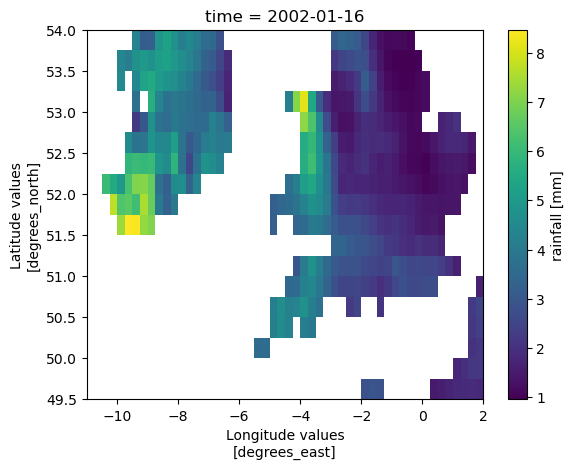

In [36]:
# You can add the `drop = True` argument to crop the data and remove the part of the coordinates where it is all NaNs:
ds.sel(time = "2002-01" # Select January 2002
      ).where(ds.latitude <= 54, # The condition: latitude is below 54°N
              drop = True
        ).rr.plot() # Plot precipitation
# Notice the latitude axis has been cropped

In [37]:
# .where is more useful where you want to subset based on the values of a variables, and not a coordinate
# For example, let us subset to where and when the monthly temperature was below 0°C
ds_freezing = ds.where(ds.tg < 0,)
ds_freezing

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 888, latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Data variables:
    pp         (time, latitude, longitude) float32 7MB nan nan nan ... nan nan
    rr         (time, latitude, longitude) float32 7MB nan nan nan ... nan nan
    tg         (time, latitude, longitude) float32 7MB nan nan nan ... nan nan
Attributes:
    Conventions:  CF-1.6
    frequency:    mon

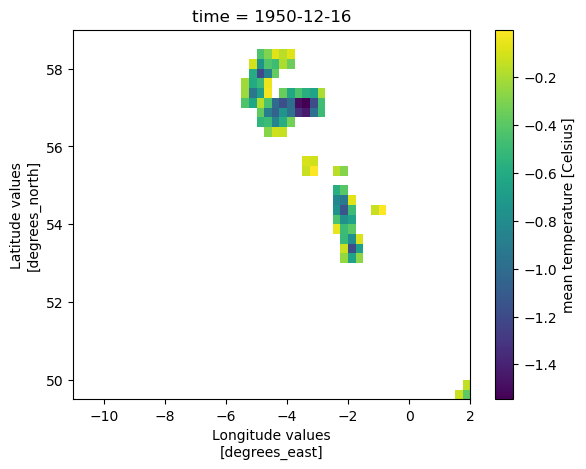

In [38]:
# Plot the freezing placing in December 1950 and 2022
ds_freezing.sel(time = "1950-12").tg.plot()

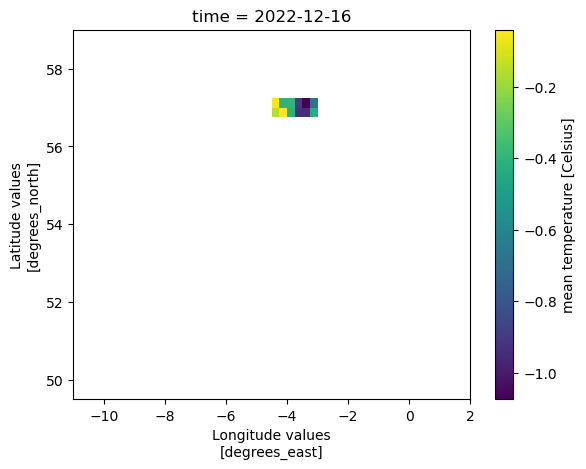

In [39]:
ds_freezing.sel(time = "2022-12").tg.plot()

In [40]:
# List of the freezing months in Oxford
T_Oxford.where(T_Oxford < 0, drop = True).time

<xarray.DataArray 'time' (time: 6)> Size: 48B
array(['1956-02-15T00:00:00.000000000', '1963-01-16T00:00:00.000000000',
       '1963-02-14T00:00:00.000000000', '1979-01-16T00:00:00.000000000',
       '1986-02-14T00:00:00.000000000', '2010-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 48B 1956-02-15 1963-01-16 ... 2010-12-16
    latitude   float64 8B 51.75
    longitude  float64 8B -1.26
Attributes:
    standard_name:  time
    long_name:      Time in days
    bounds:         time_bnds
    axis:           T

### Computation
You can perform many operations directly on the DataArrays

#### Arithmetics

In [41]:
# Example: Add a constant to transform temperature to K
T_Kelvin = T_Oxford + 273.15

# Nota: When you change perform such operation, you may want to change the units in the attributes
T_Kelvin.attrs["units"] = 'K'

T_Kelvin

<xarray.DataArray 'tg' (time: 888)> Size: 7kB
array([276.9572193 , 278.81271056, 280.62680624, 281.05849315,
       284.33654176, 289.6255957 , 289.41901936, 289.28084116,
       286.42984959, 282.76913514, 278.92281319, 274.44722899,
       277.37543216, 276.88346781, 277.58265143, 280.19857985,
       283.27734813, 287.47829287, 290.03151918, 288.50423496,
       287.58202294, 282.11327744, 281.73778651, 278.52132246,
       275.84348703, 276.26488275, 279.91512257, 282.98465944,
       286.88150265, 288.17731616, 290.52459976, 289.73750326,
       284.26490323, 282.05637098, 277.03184658, 275.57222899,
       275.88010963, 277.08667851, 278.41890637, 280.9179465 ,
       285.8564899 , 287.47612329, 288.95745777, 289.68416412,
       287.10665299, 283.08792873, 281.29576638, 279.90190627,
       275.82047087, 275.95496777, 279.24303533, 280.54203654,
       284.07072572, 286.9445698 , 287.69850951, 288.06621592,
       286.29440973, 285.22801586, 280.12717974, 280.37668048,
       275.76966769, 274.56858925, 276.30243856, 282.81537985,
       283.16632913, 287.48691643, 290.86900293, 291.59092205,
       287.39460615, 282.1651193 , 279.90041984, 278.65548374,
       276.39791929, 272.37285175, 279.40816773, 280.13809654,
       285.40428057, 286.57986313, 289.41303812, 287.27078343,
...
       287.04280926, 290.41449312, 291.27207352, 289.67755445,
       287.33187954, 285.79861592, 279.76005994, 277.94817414,
       278.63561596, 276.08425708, 278.49248694, 283.64692629,
       287.02158321, 289.94072935, 293.55204439, 290.77024132,
       287.7566265 , 283.89908033, 281.33326656, 280.23700637,
       276.73064508, 279.90968563, 281.59195805, 282.48071958,
       285.24206092, 288.26682636, 291.73803535, 291.2356222 ,
       288.28996281, 283.63534171, 279.57569656, 279.32964498,
       279.794887  , 279.87213086, 279.97519653, 284.28184297,
       286.62860294, 289.17503263, 290.25306736, 291.74991566,
       287.90329297, 284.10793505, 281.54349996, 278.16545781,
       276.51831924, 278.56713563, 280.50194501, 279.80674979,
       283.96962247, 289.55809309, 291.77221546, 289.79407681,
       289.69531673, 285.65580597, 280.34843333, 280.02067401,
       277.6391837 , 280.29105705, 281.15487729, 282.77781325,
       287.07253521, 288.97288971, 292.54446039, 293.00085459,
       288.43186955, 286.68132852, 282.94812326, 276.78601283,
       277.81096442, 279.51162497, 280.39801279, 282.17420291,
       286.05285452, 290.79263983, 289.85839674, 290.12653208,
       290.78612936, 286.18972548, 280.77582981, 280.60035464])
Coordinates:
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
    latitude   float64 8B 51.75
    longitude  float64 8B -1.26
Attributes:
    units:    K

In [42]:
# Task: Convert the pressure to Pa
# P_Pa = ds.pp * 100
# P_Pa.attrs["units"]
# P_Pa

In [43]:
# You can also apply numpy functions
# Here is an example with the square root of pressure (note it makes no sense physically)
np.sqrt(ds.pp)

<xarray.DataArray 'pp' (time: 888, latitude: 38, longitude: 52)> Size: 7MB
array([[[      nan,       nan,       nan, ..., 32.004585, 32.005997,
         32.006805],
        [      nan,       nan,       nan, ..., 32.007004, 32.009525,
         32.01159 ],
        [      nan,       nan,       nan, ...,       nan, 32.009678,
         32.015522],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 31.810488, 31.815203,
         31.817953],
        [      nan,       nan,       nan, ..., 31.807905, 31.810825,
         31.811274],
        [      nan,       nan,       nan, ...,       nan, 31.806334,
         31.806896],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 31.86038 , 31.860432,
         31.860432],
        [      nan,       nan,       nan, ..., 31.853191, 31.85304 ,
         31.853243],
        [      nan,       nan,       nan, ...,       nan, 31.845596,
         31.845545],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Attributes:
    standard_name:  air_pressure_at_sea_level
    long_name:      sea level pressure
    units:          hPa
    cell_methods:   time: mean

#### Statistics
You can perform all basic statistical operations directly on the DataArrays

In [44]:
# Example: Compute the mean temperature over all dimensions
ds.tg.mean()

<xarray.DataArray 'tg' ()> Size: 4B
array(8.975661, dtype=float32)

In [45]:
# Task: Compute the mean temperature in Oxford
T_Oxford.mean()
# Is Oxford warmer or colder than the UK overall?

<xarray.DataArray 'tg' ()> Size: 8B
array(10.01024573)
Coordinates:
    latitude   float64 8B 51.75
    longitude  float64 8B -1.26

In [46]:
# Task: compute the standard devation of the pressure with the std method
ds.pp.std()

<xarray.DataArray 'pp' ()> Size: 4B
array(5.769912, dtype=float32)

In [47]:
# You may apply these operations only over a subset of dimensions
# Example: Compute the mean temperature over time only
ds.tg.mean("time") # Notice the DataArray now has only longitude and latitude as coordinates

<xarray.DataArray 'tg' (latitude: 38, longitude: 52)> Size: 8kB
array([[      nan,       nan,       nan, ..., 10.133058, 10.025464,
         9.984549],
       [      nan,       nan,       nan, ..., 10.249087, 10.141654,
        10.194534],
       [      nan,       nan,       nan, ...,       nan, 10.556308,
        10.476766],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875

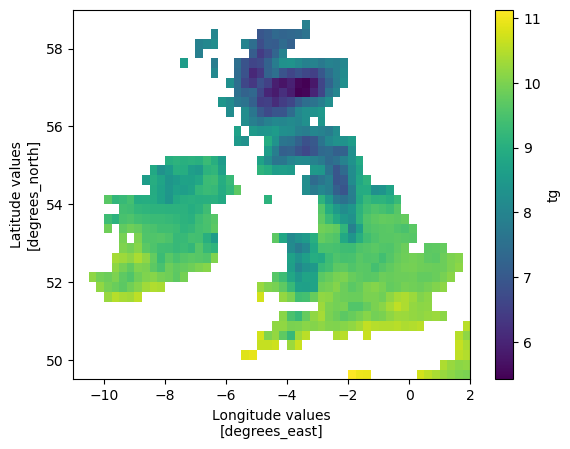

In [48]:
ds.tg.mean("time").plot() # Plot of the mean temperature

In [49]:
# Task: Compute the mean over time of Ireland's precipitation
precip_Ireland_climatology = precip_Ireland.mean("time")
precip_Ireland_climatology

<xarray.DataArray 'rr' (latitude: 20, longitude: 24)> Size: 2kB
array([[      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan, 4.992192 , 4.9973707,
        5.009978 , 4.4625025, 3.5178287,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan, 5.2734227, 5.7326026, 5.639087 ,
        5.4077625, 4.413071 , 3.544081 , 3.1219382, 2.9251468, 2.933073 ,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan, 4.9000125, 5.2206388, 5.109441 , 4.6107955,
        4.4090085, 3.9446201, 3.2329671, 2.996095 , 3.0574663, 3.2390513,
        3.28001  , 3.2738533, 3.0421336,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
...
              nan,       nan,       nan,       nan, 4.4834385, 4.9628873,
        4.732409 , 3.962575 , 3.582762 , 3.461168 , 3.2767553, 2.8606112,
        2.6949465, 2.869071 ,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
        4.2028255, 3.8031645, 3.5196652, 3.2593186, 3.0276637, 2.8505392,
        2.9501264, 3.1627786,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan, 3.781444 , 3.8244126,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan, 4.1399164,       nan, 4.536762 ]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float64 160B 51.12 51.38 51.62 ... 55.38 55.62 55.88
  * longitude  (longitude) float64 192B -10.88 -10.62 -10.38 ... -5.375 -5.125

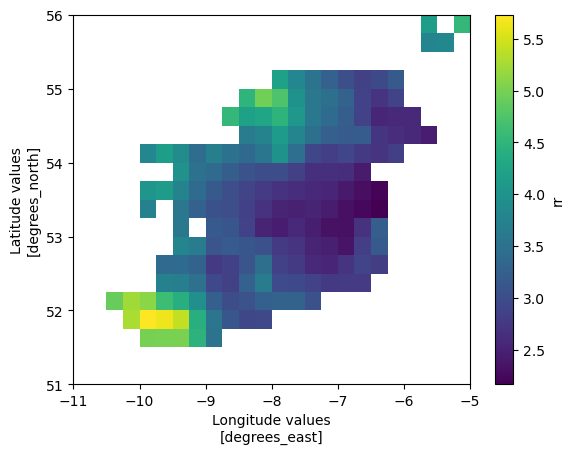

In [50]:
# Task: Plot the mean precipitation over Ireland
precip_Ireland_climatology.plot()

#### Areal means

With xarray, you can average over as many variable as you want. However, when computing areal means, always, ALWAYS, remember that all the cell in your data might not have the same surface! Therefore, you need to weight your average by the surface of the cell. 
For longitude-latitude data like ours, the area of each cell is proportional to the cosinus of the latitude.

Below, we show the average over latitude and longitude with a without weighting. Notice the difference between the two results. 

In [51]:
# You can average very simply over several variables, e.g.,
ds.tg.mean(["longitude", "latitude"])

<xarray.DataArray 'tg' (time: 888)> Size: 4kB
array([ 4.5354075 ,  4.397892  ,  6.932005  ,  6.7248077 , 10.263025  ,
       14.504285  , 14.837909  , 14.558698  , 12.029456  ,  9.065698  ,
        5.087205  ,  1.3453186 ,  3.461462  ,  2.891893  ,  3.675649  ,
        5.9563875 ,  8.791941  , 12.593507  , 14.979044  , 13.822098  ,
       13.132457  ,  9.826356  ,  7.4807878 ,  5.061853  ,  2.188891  ,
        3.4135656 ,  6.064447  ,  8.438764  , 11.785242  , 12.6701    ,
       15.143879  , 14.770357  , 10.439907  ,  8.541551  ,  4.2107644 ,
        3.2112443 ,  3.7228706 ,  4.3763194 ,  5.404795  ,  6.4266725 ,
       11.5751505 , 13.011288  , 14.37821   , 14.880605  , 13.260685  ,
        9.640497  ,  7.765261  ,  6.530346  ,  3.0612462 ,  2.5444682 ,
        5.126755  ,  7.115176  , 10.167838  , 12.287158  , 13.129517  ,
       13.417859  , 11.701332  , 10.771872  ,  6.125025  ,  5.976485  ,
        2.4315274 ,  1.0154597 ,  2.952621  ,  8.629023  ,  8.889675  ,
       12.517032  , 16.056097  , 16.612886  , 13.493534  ,  8.662181  ,
        7.0012636 ,  5.087563  ,  3.352749  ,  0.5265306 ,  5.7986937 ,
        6.3563213 , 10.786631  , 12.043217  , 14.360699  , 12.596267  ,
       13.089391  ,  9.202276  ,  6.186458  ,  5.7005424 ,  4.7521496 ,
        4.5365114 ,  8.265087  ,  8.04749   ,  9.699878  , 13.678612  ,
       14.977048  , 14.409442  , 11.72782   , 10.145722  ,  6.133262  ,
        4.2631745 ,  3.2586489 ,  4.10509   ,  3.2588403 ,  6.7693605 ,
...
        8.40788   ,  8.036105  ,  4.945069  ,  4.1285787 ,  5.5676055 ,
        6.7631226 , 11.47451   , 14.146359  , 15.370932  , 15.61245   ,
       14.600166  , 10.029841  ,  5.1562023 ,  6.146145  ,  4.286192  ,
        5.548099  ,  7.516024  ,  8.303949  , 12.190725  , 14.470749  ,
       15.236362  , 14.6388855 , 12.698118  , 11.3780775 ,  6.0216694 ,
        4.4109015 ,  4.3867955 ,  2.7195394 ,  4.0792027 ,  8.650799  ,
       12.151999  , 15.05968   , 17.184875  , 15.2971115 , 12.413236  ,
        9.585949  ,  7.4018183 ,  6.2498713 ,  3.8600128 ,  6.4171915 ,
        6.9269614 ,  8.610751  , 10.262614  , 13.19949   , 16.393652  ,
       15.823609  , 13.282517  ,  9.167158  ,  5.4683223 ,  5.4443855 ,
        5.823804  ,  5.3038235 ,  5.8015485 ,  9.30537   , 11.508174  ,
       14.005865  , 14.429785  , 15.905312  , 13.050889  ,  9.598866  ,
        7.857032  ,  4.5455604 ,  2.528199  ,  4.585088  ,  6.5520163 ,
        6.119974  ,  9.273668  , 14.176857  , 16.733492  , 15.142939  ,
       14.736556  , 11.097122  ,  7.227381  ,  5.6975245 ,  5.0137124 ,
        5.918493  ,  6.8110886 ,  8.270387  , 12.025729  , 13.897689  ,
       16.594912  , 16.661034  , 13.542007  , 11.901032  ,  8.454915  ,
        3.242011  ,  4.7158303 ,  6.1423993 ,  6.1147947 ,  8.204967  ,
       11.817404  , 15.9711275 , 15.042157  , 15.526228  , 15.190179  ,
       10.953404  ,  6.7647076 ,  6.2645636 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16

In [52]:
# However, when you average data over space, remember to always be careful about the curvature of the Earth. 
# To account for it, and get a real areal mean, use a weighted mean
lat_rad = np.deg2rad(ds.latitude) # Get latitude in radians
ds.tg.weighted(np.cos(lat_rad)).mean(["latitude", "longitude"]) # Apply weights corresponding to the cosinus of the latitude before the mean
# Notice the values are slightly different than they were before

<xarray.DataArray 'tg' (time: 888)> Size: 7kB
array([ 4.55322635,  4.47409282,  6.96987729,  6.77993944, 10.31776152,
       14.56709388, 14.89161418, 14.60827498, 12.08686262,  9.11420813,
        5.14798125,  1.38744531,  3.51488847,  2.94213536,  3.72627713,
        6.01339213,  8.84626225, 12.6568011 , 15.03682071, 13.87706637,
       13.18691352,  9.84580957,  7.53178845,  5.10572055,  2.25481292,
        3.43528462,  6.1093955 ,  8.47943666, 11.83940803, 12.7421138 ,
       15.20843807, 14.83707412, 10.49251067,  8.5941163 ,  4.25036391,
        3.23861564,  3.71687585,  4.38252977,  5.41050066,  6.48928121,
       11.62187375, 13.05548493, 14.43174457, 14.93790322, 13.29619314,
        9.67065867,  7.80298989,  6.58180754,  3.0815925 ,  2.57389834,
        5.18230989,  7.14517737, 10.20615492, 12.33921289, 13.17469952,
       13.46953499, 11.77128487, 10.84832576,  6.18544753,  6.04940888,
        2.48099365,  1.06697075,  2.9711442 ,  8.66001948,  8.94145927,
       12.57592467, 16.10556229, 16.67541377, 13.54762768,  8.70989616,
        7.01783634,  5.1553897 ,  3.39200367,  0.49769857,  5.8413072 ,
        6.39713464, 10.82993041, 12.09678991, 14.42111797, 12.65893141,
       13.15347144,  9.24464137,  6.20485112,  5.73691952,  4.78886674,
        4.59915335,  8.32458655,  8.08335316,  9.74935941, 13.74641401,
       15.04724696, 14.470069  , 11.79598826, 10.19195492,  6.15438173,
        4.29425445,  3.31230779,  4.18337343,  3.30858975,  6.80439069,
...
        8.48844238,  8.13333159,  4.99998182,  4.19032323,  5.59260627,
        6.81752682, 11.5269662 , 14.2022256 , 15.43879145, 15.68643929,
       14.66416676, 10.07983171,  5.21526749,  6.15578375,  4.30024929,
        5.59309275,  7.58076998,  8.34609036, 12.23867396, 14.54464714,
       15.31310188, 14.693253  , 12.74661809, 11.43240897,  6.0872393 ,
        4.46326349,  4.4644782 ,  2.74900802,  4.13125766,  8.71628728,
       12.19697296, 15.12051779, 17.26322231, 15.37754854, 12.48341195,
        9.64483858,  7.44708105,  6.31859565,  3.90520069,  6.45746335,
        6.9826986 ,  8.64559959, 10.32492767, 13.25984154, 16.44619339,
       15.8893214 , 13.3486785 ,  9.2400248 ,  5.53910711,  5.49319393,
        5.85582994,  5.38143511,  5.85526503,  9.37842635, 11.5658851 ,
       14.05901953, 14.50243252, 15.99185543, 13.11881017,  9.65758327,
        7.90091592,  4.58982725,  2.59386589,  4.64359319,  6.58818128,
        6.16740775,  9.32648   , 14.23114347, 16.78333714, 15.18967206,
       14.80099658, 11.16117013,  7.26157584,  5.77749145,  5.02302969,
        5.98548953,  6.86477549,  8.3227425 , 12.07877201, 13.94852856,
       16.6675877 , 16.7552706 , 13.59583256, 11.97056853,  8.50817739,
        3.29438621,  4.76386008,  6.16713482,  6.18661412,  8.24990024,
       11.86124824, 16.02747011, 15.1039538 , 15.57994463, 15.27644869,
       11.04162655,  6.83776571,  6.34725095])
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16

## Grouping
[See how much about grouping is covered in the pandas file]

In [53]:
# To group we need a variable that contains the groups we want. Here, let us create a year variable:
ds["year"] = ds.time.dt.year
ds.year

<xarray.DataArray 'year' (time: 888)> Size: 7kB
array([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951,
       1951, 1951, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952,
       1952, 1952, 1952, 1953, 1953, 1953, 1953, 1953, 1953, 1953, 1953,
       1953, 1953, 1953, 1953, 1954, 1954, 1954, 1954, 1954, 1954, 1954,
       1954, 1954, 1954, 1954, 1954, 1955, 1955, 1955, 1955, 1955, 1955,
       1955, 1955, 1955, 1955, 1955, 1955, 1956, 1956, 1956, 1956, 1956,
       1956, 1956, 1956, 1956, 1956, 1956, 1956, 1957, 1957, 1957, 1957,
       1957, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1958, 1958, 1958,
       1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1959, 1959,
       1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1960,
       1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961,
       1961, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962,
       1962, 1962, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963,
       1963, 1963, 1963, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964,
       1964, 1964, 1964, 1964, 1965, 1965, 1965, 1965, 1965, 1965, 1965,
       1965, 1965, 1965, 1965, 1965, 1966, 1966, 1966, 1966, 1966, 1966,
       1966, 1966, 1966, 1966, 1966, 1966, 1967, 1967, 1967, 1967, 1967,
       1967, 1967, 1967, 1967, 1967, 1967, 1967, 1968, 1968, 1968, 1968,
...
       2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015,
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023])
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
Attributes:
    standard_name:  time
    long_name:      Time in days
    bounds:         time_bnds
    axis:           T

In [54]:
# Now we can group along year
ds.groupby("year")

<DatasetGroupBy, grouped over 1 grouper(s), 74 groups in total:
    'year': 74 groups with labels 1950, 1951, 1952, ..., 2022, 2023>

In [55]:
# and we can perform operations on these groups
print(ds.groupby("year").max()) # Maximum value per year
print(ds.groupby("year").mean()) # Yearly average

<xarray.Dataset> Size: 2MB
Dimensions:    (year: 74, latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * year       (year) int64 592B 1950 1951 1952 1953 ... 2020 2021 2022 2023
Data variables:
    pp         (year, latitude, longitude) float32 585kB nan nan nan ... nan nan
    rr         (year, latitude, longitude) float32 585kB nan nan nan ... nan nan
    tg         (year, latitude, longitude) float32 585kB nan nan nan ... nan nan
Attributes:
    Conventions:  CF-1.6
    frequency:    mon
<xarray.Dataset> Size: 2MB
Dimensions:    (year: 74, latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * year       (year) int64 592B 1950 1951 1952 1953 ... 2020 2021 2022 2023
Data variables:
    pp    

In [56]:
# For time coordinates, there is actually a more convenient way to do it, as you can access the components of times directly (e.g. time.year, time.month)
print(ds.groupby("time.year").mean()) # Yearly average
print(ds.groupby("time.month").mean()) # Average over all months (=seasonal cycle)
print(ds.groupby("time.dayofyear").mean()) # Average over each day. 
# Note: dayofyear does not make a lot of sense hear as we are using monthly data, but it is useful to keep in mind for daily or hourly data.

<xarray.Dataset> Size: 2MB
Dimensions:    (year: 74, latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * year       (year) int64 592B 1950 1951 1952 1953 ... 2020 2021 2022 2023
Data variables:
    pp         (year, latitude, longitude) float32 585kB nan nan nan ... nan nan
    rr         (year, latitude, longitude) float32 585kB nan nan nan ... nan nan
    tg         (year, latitude, longitude) float32 585kB nan nan nan ... nan nan
Attributes:
    Conventions:  CF-1.6
    frequency:    mon
<xarray.Dataset> Size: 285kB
Dimensions:    (month: 12, latitude: 38, longitude: 52)
Coordinates:
  * latitude   (latitude) float64 304B 49.62 49.88 50.12 ... 58.38 58.62 58.88
  * longitude  (longitude) float64 416B -10.88 -10.62 -10.38 ... 1.625 1.875
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pp         (month, l

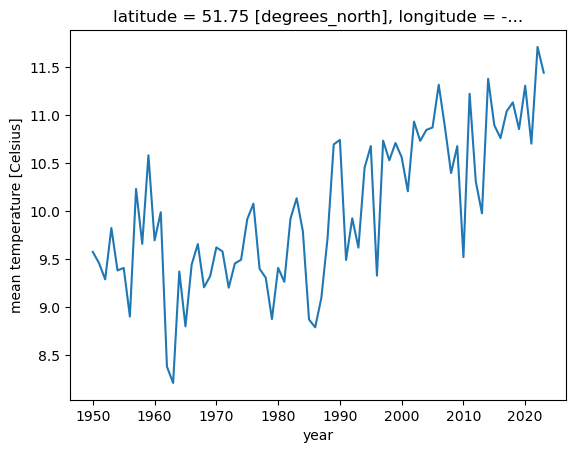

In [57]:
# Task: Compute the yearly temperature in Oxford
T_Oxford_yearly = T_Oxford.groupby("time.year").mean()
# Plot it
T_Oxford_yearly.plot()

## Saving to netcdf
In some cases, you are going to want to save the result of your code. You can use the `to_netcdf()`method to do so.

In [58]:
T_Oxford_yearly.to_netcdf("T_oxford_yearly.nc")

## Wrap-up on the two analyses

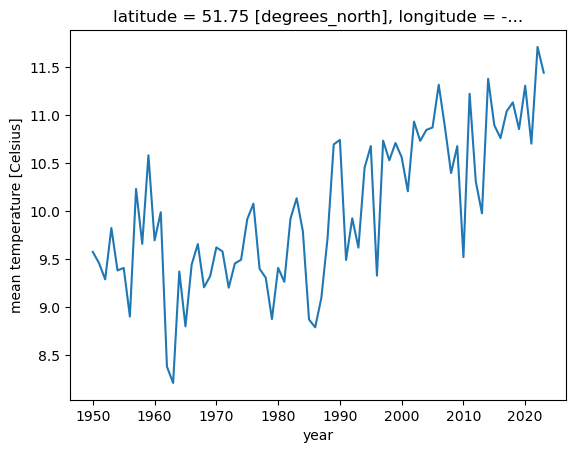

In [59]:
# Yearly time series of temperature over Oxford
ds = xr.open_dataset(file) # Open the file
T = ds.tg # Select temperature
T_Oxford = T.interp(latitude = 51.75, longitude = -1.26,) # Interpolate the temperature to Oxford's coordinates
T_Oxford_yearly = T_Oxford.groupby("time.year").mean() # Compute the mean by year
T_Oxford_yearly.plot() #Plot

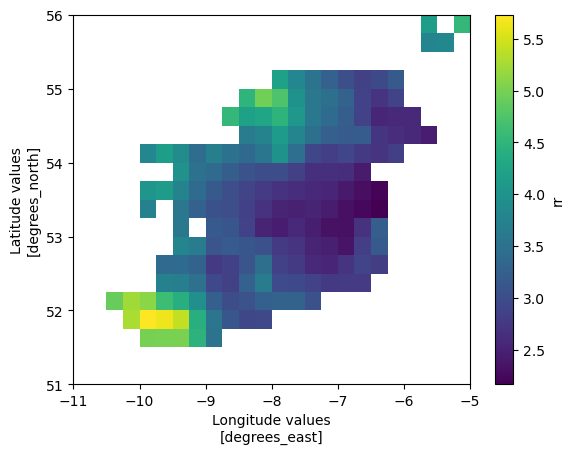

In [60]:
# Precipitation climatology over Ireland
ds = xr.open_dataset(file) # Open the file
precip = ds.rr # Select temperature
precip_Ireland = ds.rr.sel(longitude = slice(-11,-5), latitude = slice(51,56)) # Select Ireland
precip_Ireland_climatology = precip_Ireland.mean("time") # Average over time
precip_Ireland_climatology.plot() # Plot

## Customize your xarray plots

Text(0, 0.5, '10m-temperature (°C)')

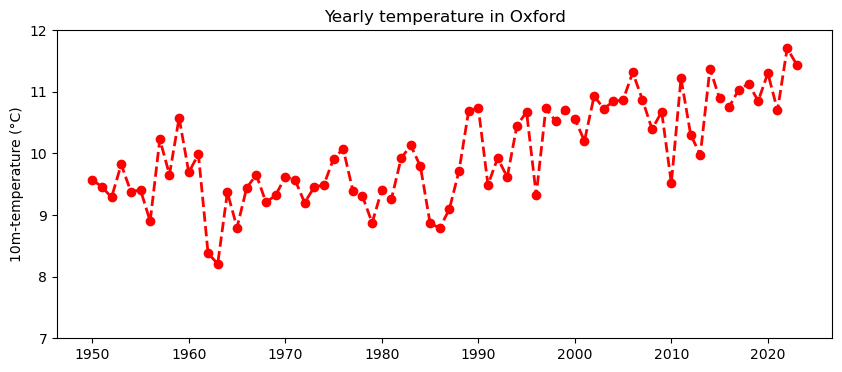

In [61]:
# Time series
T_Oxford_yearly.plot.line(
    color = "red", linestyle = "--", linewidth = 2, #Change line properties
    marker = "o", # Add markers at data points
    ylim = (7,12), # Change y-axis range
    figsize = [10,4] # Change figure size
)
plt.title("Yearly temperature in Oxford") # Change the default title
plt.xlabel("") # Remove x label
plt.ylabel("10m-temperature (°C)")

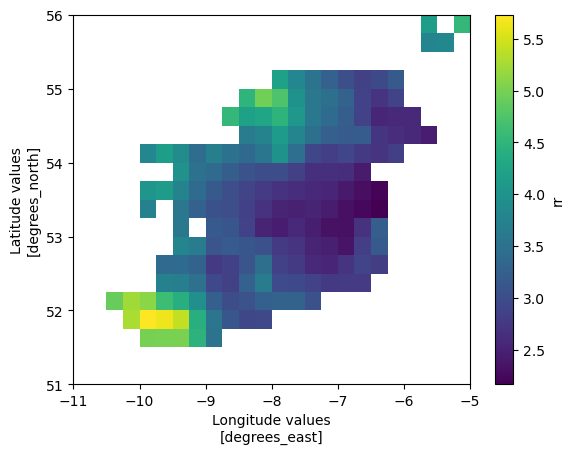

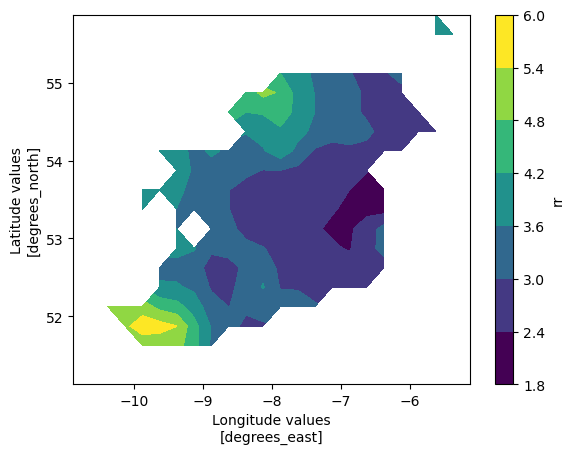

In [62]:
# Maps
## pcolormesh vs. contourf
plt.figure()
precip_Ireland_climatology.plot.pcolormesh() # default plot
plt.figure()
precip_Ireland_climatology.plot.contourf()

Text(0, 0.5, 'Latitude (°N)')

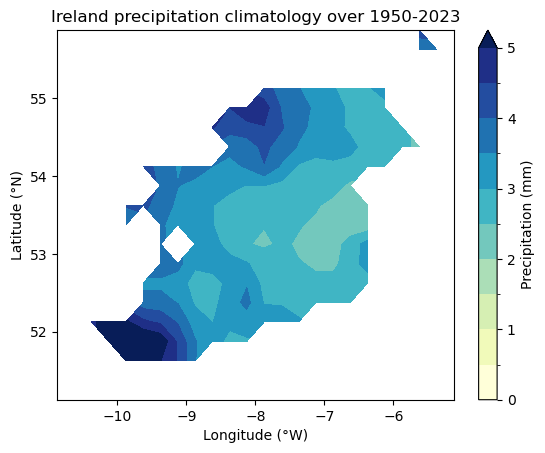

In [63]:
## Customization (works for pcolormesh or contourf
plt.figure()
precip_Ireland_climatology.plot.contourf(
    vmin = 0, vmax = 5, # Set value range for colors
    cmap = "YlGnBu", # change colormap
    levels = 11, # Split the colormap in 11 colors
    cbar_kwargs = dict(label = "Precipitation (mm)"), # Label the colorbar
)
plt.title("Ireland precipitation climatology over 1950-2023")
plt.xlabel("Longitude (°W)")
plt.ylabel("Latitude (°N)")